In [2]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle 
import warnings 

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

In [9]:
n = 8
X_train_sample = X_train[:n]

In [10]:
X_train_sample.shape

(8, 32, 32, 3)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# dataget_train = ImageDataGenerator(rotation_range=90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1, 5))



dataget_train.fit(X_train_sample)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [6.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [8.0..255.0].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [34.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [8.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [51.0..255.0].


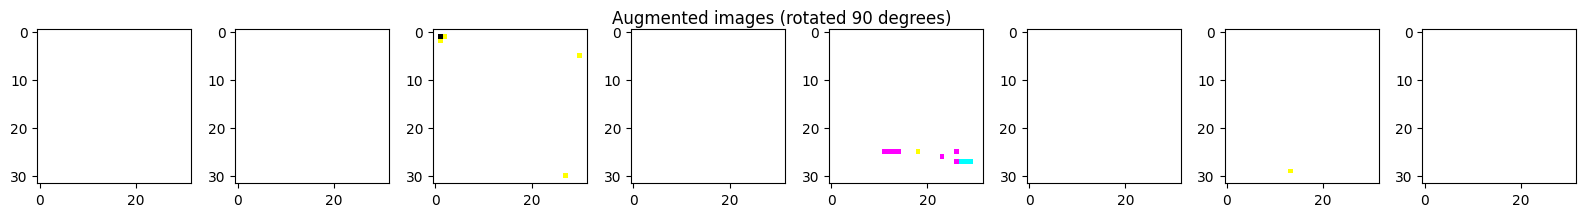

In [12]:
fig = plt.figure(figsize=(20, 2))
for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(0, n):
        axes = fig.add_subplot(1, n, i+1)
        axes.imshow(x_batch[i])
    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break

In [13]:
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

In [14]:
datagen.fit(X_train)

In [15]:
from tensorflow.keras.models import load_model

model = load_model("Cifar10_model.h5")

In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=2
)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.1782 - loss: 5.5301
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.3172 - loss: 1.8488


In [18]:
score = model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3609 - loss: 1.7676
Test accuracy 0.3614000082015991


In [19]:
# Save the model
model.save("image_model.h5")